# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

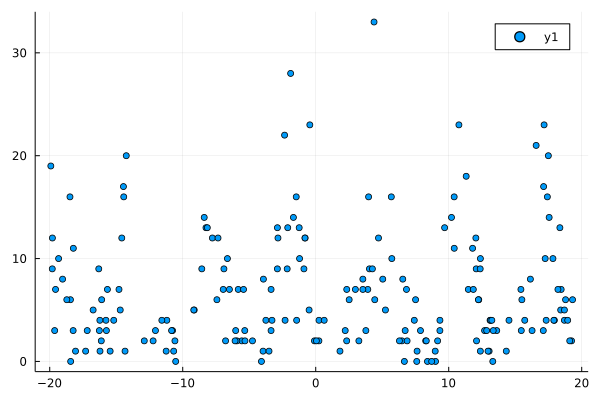

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -620.5360894923253
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.524811 seconds (7.02 M allocations: 447.380 MiB, 2.48% gc time, 98.19% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.1999222254936811, 0.2969299703029968, 0.4763211764382947, 0.33237054912815944, 0.26982235675691946, 0.5065633435241164, 0.16806710546222814, 0.4952320557459368, 0.19311109372847232, 0.2542361717250385  …  0.4704775413507039, 0.5100377686231026, 0.2984576281485703, 0.19430846911453173, 0.33294450297101047, 0.2905271148672179, 0.5990608232554513, 0.46439364628057905, 0.3228745392800598, 0.19035117652210007], θ = [4.4850713293187, 5.459943072845258, 5.398318819432936, 5.9453683466322875, 4.472895773725151, 2.9374529044746085, 4.489437377785811, 9.310486514310488, 3.987615550402315, 3.4812688854683307  …  4.418791159164988, 16.151375785949142, 13.89699433084007, 3.489029315972431, 4.458886179256126, 2.979075099872497, 13.595812866004998, 8.841667649954468, 5.948413725706731, 7.477435773222621]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTup

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -713.797465342094
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.375146 seconds (4.44 M allocations: 311.804 MiB, 5.55% gc time, 94.19% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 14.584917215714073) infered by Analytic Variational Inference , (local_vars = (c = [0.23837388646630037, 0.4554148603023918, 0.40387180183759297, 0.2091764196036658, 0.45163905483037475, 0.7243196864697478, 0.21535585923909276, 0.4434119507912161, 0.3803399791072983, 0.46220926236963567  …  0.690928227536797, 0.46080967829988073, 0.17519519601636158, 0.3606432852644833, 0.544114475862461, 0.5232858586090192, 0.5820289218780811, 0.38297031755869676, 0.1945492096139194, 0.19779890496703562], θ = [5.902662129587596, 7.205337479822814, 5.87376655514587, 6.815408033682077, 6.2610642534143155, 5.134820724393569, 5.904502386935414, 9.71808009953185, 5.703128234968172, 5.319832117128394  …  6.4811562197337755, 16.55292870255422, 14.919450306588269, 5.161742474290006, 6.397387980658581, 4.928497645279206, 13.757366423408934, 9.389621812874896, 6.852641859871826, 8.834336295613397], γ = [7.861171677049383, 8.658885969189543, 5.90678141

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

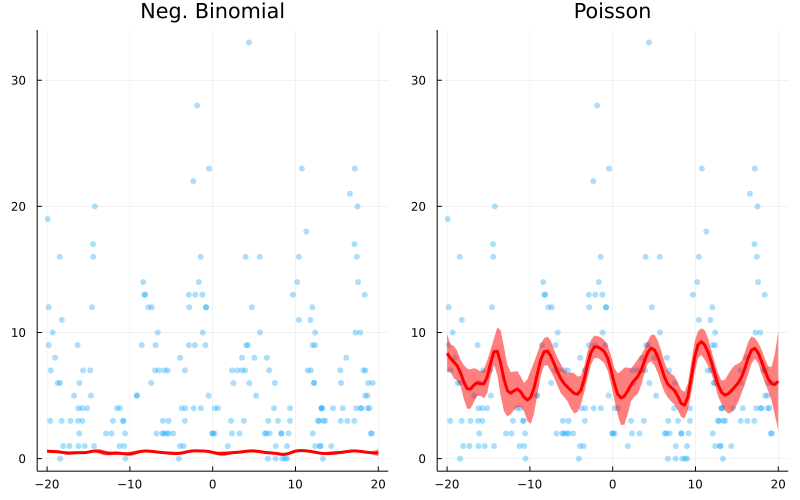

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*